In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
angle = ctrl.Antecedent(np.arange(-10, 11, 1), 'angle')
angV = ctrl.Antecedent(np.arange(-10, 11, 1), 'angV')
push = ctrl.Consequent(np.arange(-10, 11, 1), 'push')

In [ ]:
angle['lt']=fuzz.trimf(angle.universe, [-10, -10, 0])
angle['ct']=fuzz.trimf(angle.universe, [-10, 0, 10])
angle['rt']=fuzz.trimf(angle.universe, [0, 10, 10])

In [ ]:
angV['lt']=fuzz.trimf(angV.universe, [-10, -10, 0])
angV['ct']=fuzz.trimf(angV.universe, [-10, 0, 10])
angV['rt']=fuzz.trimf(angV.universe, [0, 10, 10])

In [8]:
push['ll'] = fuzz.trimf(push.universe, [-10, -10, -5])
push['sl'] = fuzz.trimf(push.universe, [-5, 0, 0])
push['d'] = fuzz.trimf(push.universe, [-10,0,10])
push['sr'] = fuzz.trimf(push.universe, [0, 0, 5])
push['lr'] = fuzz.trimf(push.universe, [5, 10, 10])

In [9]:
angle['center'].view()

ValueError: Membership function 'center' does not exist for Antecedent angle.
Available options: 'lt'; 'ct', or 'rt'.

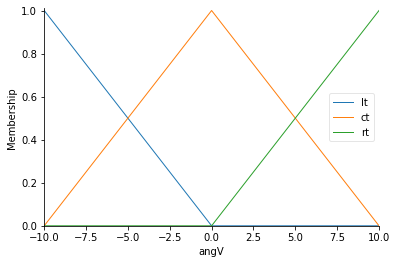

In [10]:
angV.view()

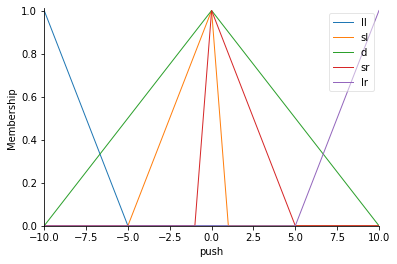

In [11]:
push.view()

In [12]:
RULE1 = ctrl.Rule(angle['lt'] and angV['lt'], push['lr'])
RULE2 = ctrl.Rule(angle['lt'] and angV['ct'], push['sr'])
RULE3 = ctrl.Rule(angle['lt'] and angV['rt'], push['d'])
RULE4 = ctrl.Rule(angle['ct'] and angV['lt'], push['sr'])
RULE5 = ctrl.Rule(angle['ct'] and angV['ct'], push['d'])
RULE6 = ctrl.Rule(angle['ct'] and angV['rt'], push['sl'])
RULE7 = ctrl.Rule(angle['rt'] and angV['lt'], push['d'])
RULE8 = ctrl.Rule(angle['rt'] and angV['ct'], push['sl'])
RULE9 = ctrl.Rule(angle['rt'] and angV['rt'], push['ll'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae12590190>)

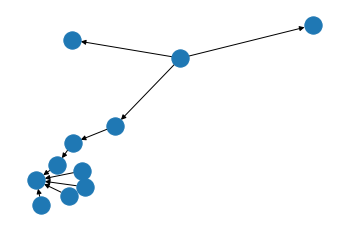

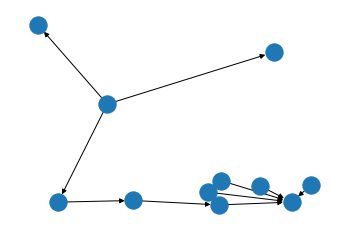

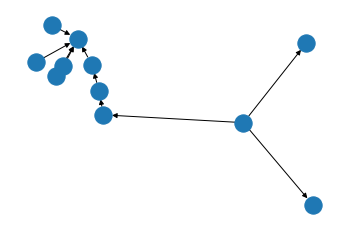

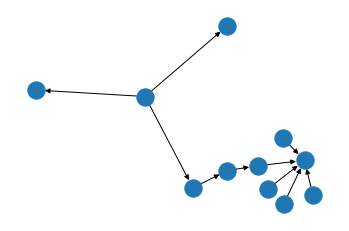

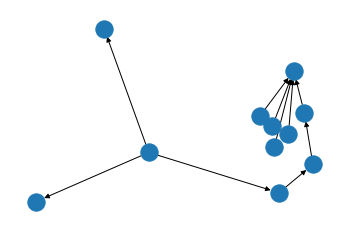

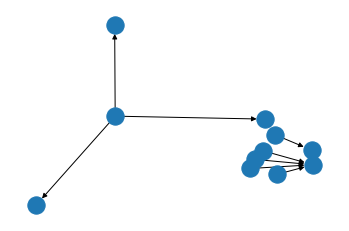

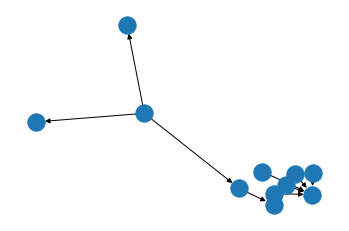

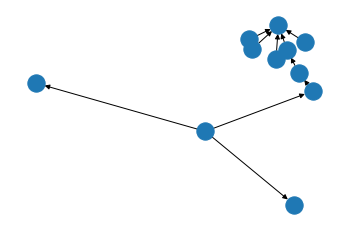

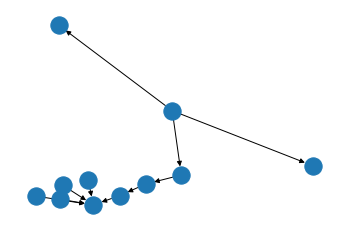

In [13]:
RULE1.view()
RULE2.view()
RULE3.view()
RULE4.view()
RULE5.view()
RULE6.view()
RULE7.view()
RULE8.view()
RULE9.view()

In [14]:
Solvectrl= ctrl.ControlSystem([RULE1, RULE2, RULE3,RULE4, RULE5, RULE6,RULE7, RULE8, RULE9])

In [15]:
final = ctrl.ControlSystemSimulation(Solvectrl)

In [16]:
solve = ctrl.ControlSystemSimulation(Solvectrl)
solve.input['angle'] = -9
solve.input['angular_velocity'] = 8

solve.compute()

solve.input['angle']= 5
solve.input['angV']= 5

ValueError: Unexpected input: angle